# **DEPENDENCIES**

In [66]:
import numpy as np
import pandas as pd
import gdown

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

import scipy.io as sio
from scipy.sparse import csc_matrix

# **DATASET**

### Social Network Ads

**Context**

This dataset pertains to a company's endeavor to target potential customers for their new brand of car through advertising. To achieve this, they have engaged a social network advertising company with a proven track record of success in similar campaigns.

**Dataset Details**

The dataset comprises 400 entries, with each entry containing the following attributes:

- **userId:** A unique identifier for each user.
- **gender:** The gender of the user.
- **age:** The age of the user.
- **estimatedsalary:** An estimate of the user's salary.
- **purchased:** A binary indicator (1=Yes, 0=No) representing whether the user purchased the new car.

**Target Variable**

The target variable is the "purchased" column, indicating whether a user bought the new car (1) or not (0). This is the variable of interest in predicting customer behavior.

**Features**

The features used to predict customer behavior are:

- **age:** The age of the user.
- **estimatedsalary:** The estimated salary of the user.

In [67]:
gdown.download(
    " https://drive.google.com/uc?id=1_dipL74M5hqwh5xa-pHtZF_kLQ6vZpvF",
    "sna_data.csv"
)

Downloading...
From:  https://drive.google.com/uc?id=1_dipL74M5hqwh5xa-pHtZF_kLQ6vZpvF
To: c:\workspace-a\DS403-Introduction-to-Statistical-Learning-IIT-Mandi\DS403_Assignment_4_B20001\Q3\sna_data.csv
100%|██████████| 10.9k/10.9k [00:00<00:00, 8.87MB/s]


'sna_data.csv'

In [68]:
sna_data = pd.read_csv("sna_data.csv")
sna_data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


Data visualization

In [69]:
sns.set(style="darkgrid")
plt.figure(figsize=(6, 6))
sns.scatterplot(
    x="Age",
    y="EstimatedSalary",
    hue="Legend",
    data=sna_data,
    palette=["red", "green"],
    s=20,
)

plt.legend(title="Purchased")
plt.title("Age vs Estimated Salary")
plt.show()

ValueError: Could not interpret value `Legend` for parameter `hue`

<Figure size 600x600 with 0 Axes>

The data is not entirely linearly separable. However, most of the data points can be separated by a straight line.

In [ ]:
X = sna_data[["Age", "EstimatedSalary"]]
y = sna_data["Purchased"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Linear kernel SVM

SVM - Linear Kernel Test accuracy:  0.8
Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0           41            8
Actual 1            8           23


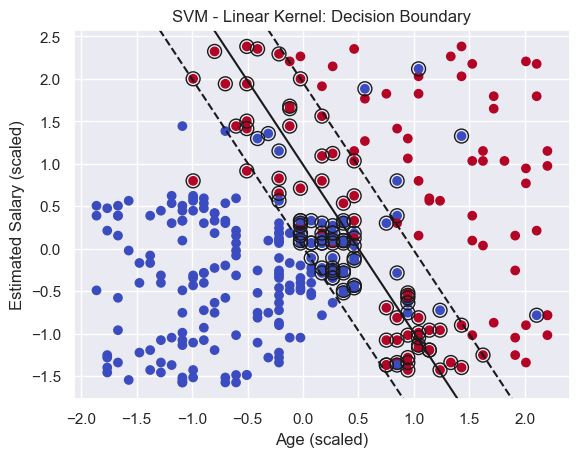

In [ ]:
classifier = SVC(kernel="linear")
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("SVM - Linear Kernel Test accuracy: ", classifier.score(X_test, y_test))
print("Confusion Matrix:")
cm_df = pd.DataFrame(
    cm,
    index=["Actual 0", "Actual 1"],
    columns=["Predicted 0", "Predicted 1"],
)
print(cm_df)

# Plot the data points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap="coolwarm")
plt.xlabel("Age (scaled)")
plt.ylabel("Estimated Salary (scaled)")

# Plot support vectors
support_vectors = classifier.support_vectors_
plt.scatter(
    support_vectors[:, 0],
    support_vectors[:, 1],
    s=100,
    facecolors="none",
    edgecolors="k",
)

# Plot decision boundary
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx, yy = np.meshgrid(
    np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50)
)
Z = classifier.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contour(xx, yy, Z, colors="k", levels=[-1, 0, 1], linestyles=["--", "-", "--"])
plt.title("SVM - Linear Kernel: Decision Boundary")

plt.show()


RBF kernel SVM

SVM - RBF Kernel Test accuracy:  0.8875
Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0           41            8
Actual 1            1           30


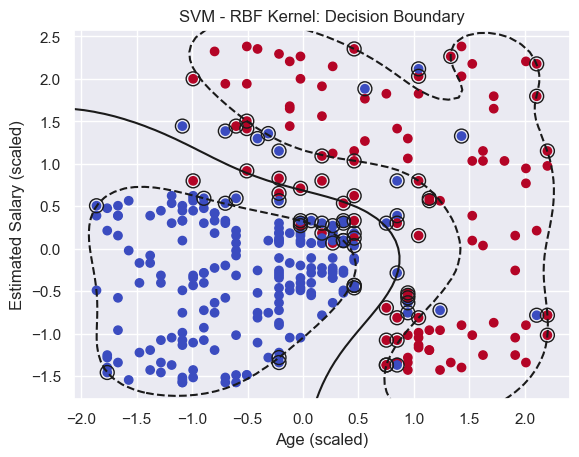

In [ ]:
classifier = SVC(kernel="rbf", gamma=0.7)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("SVM - RBF Kernel Test accuracy: ", classifier.score(X_test, y_test))
print("Confusion Matrix:")
cm_df = pd.DataFrame(
    cm,
    index=["Actual 0", "Actual 1"],
    columns=["Predicted 0", "Predicted 1"],
)
print(cm_df)

# Plot the data points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap="coolwarm")
plt.xlabel("Age (scaled)")
plt.ylabel("Estimated Salary (scaled)")

# Plot support vectors
support_vectors = classifier.support_vectors_
plt.scatter(
    support_vectors[:, 0],
    support_vectors[:, 1],
    s=100,
    facecolors="none",
    edgecolors="k",
)

# Plot decision boundary
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx, yy = np.meshgrid(
    np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50)
)
Z = classifier.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contour(xx, yy, Z, colors="k", levels=[-1, 0, 1], linestyles=["--", "-", "--"])
plt.title("SVM - RBF Kernel: Decision Boundary")

plt.show()


Polynomial kernel SVM (odd degree)

SVM - Polynomial Kernel Test accuracy:  0.85
Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0           47            2
Actual 1           10           21


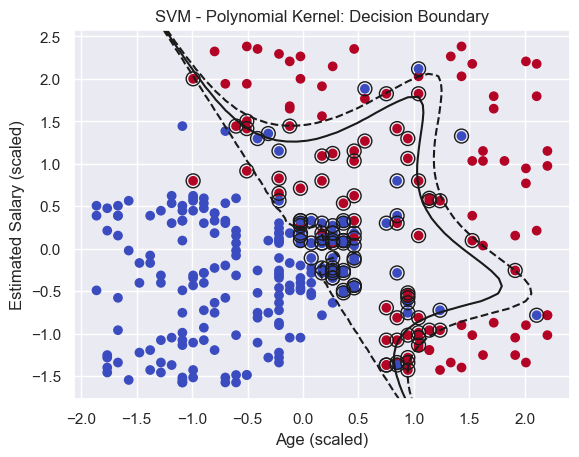

In [ ]:
classifier = SVC(kernel="poly", degree=5)   
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("SVM - Polynomial Kernel Test accuracy: ", classifier.score(X_test, y_test))
print("Confusion Matrix:")
cm_df = pd.DataFrame(
    cm,
    index=["Actual 0", "Actual 1"],
    columns=["Predicted 0", "Predicted 1"],
)
print(cm_df)

# Plot the data points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap="coolwarm")
plt.xlabel("Age (scaled)")
plt.ylabel("Estimated Salary (scaled)")

# Plot support vectors
support_vectors = classifier.support_vectors_
plt.scatter(
    support_vectors[:, 0],
    support_vectors[:, 1],
    s=100,
    facecolors="none",
    edgecolors="k",
)

# Plot decision boundary
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx, yy = np.meshgrid(
    np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50)
)
Z = classifier.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contour(xx, yy, Z, colors="k", levels=[-1, 0, 1], linestyles=["--", "-", "--"])
plt.title("SVM - Polynomial Kernel: Decision Boundary")

plt.show()


Polynomial kernel SVM (even degree)

SVM - Polynomial Kernel Test accuracy:  0.7625
Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0           45            4
Actual 1           15           16


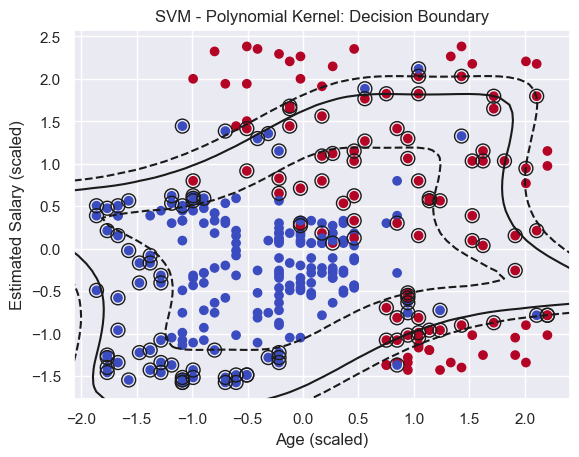

In [ ]:
classifier = SVC(kernel="poly", degree=6)   
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("SVM - Polynomial Kernel Test accuracy: ", classifier.score(X_test, y_test))
print("Confusion Matrix:")
cm_df = pd.DataFrame(
    cm,
    index=["Actual 0", "Actual 1"],
    columns=["Predicted 0", "Predicted 1"],
)
print(cm_df)

# Plot the data points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap="coolwarm")
plt.xlabel("Age (scaled)")
plt.ylabel("Estimated Salary (scaled)")

# Plot support vectors
support_vectors = classifier.support_vectors_
plt.scatter(
    support_vectors[:, 0],
    support_vectors[:, 1],
    s=100,
    facecolors="none",
    edgecolors="k",
)

# Plot decision boundary
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx, yy = np.meshgrid(
    np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50)
)
Z = classifier.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contour(xx, yy, Z, colors="k", levels=[-1, 0, 1], linestyles=["--", "-", "--"])
plt.title("SVM - Polynomial Kernel: Decision Boundary")

plt.show()


The SVM models with the kernels naturally performed better. There is one thing to note though, the model with polynomial kernel 
worked better on odd degrees than even degrees.

# **DATASET**

### 20 Newsgroups

### Description

Subset of the "20 Newsgroups" dataset, containing 842 documents for classification. These documents are categorized into two topics: talk.politics.misc and talk.religion.misc. You have access to two main matrices for this classification task:

1. **Xtrain**: This matrix is used for training and is sparse. Each row in Xtrain represents a document, and each column represents a feature, which corresponds to a word in the document. If $X_{ij} = 1$, it indicates that the word represented by the j-th column is present in the i-th document.

2. **Ytrain**: This vector contains labels for the training data. It uses binary encoding, with labels as 1 or -1 (instead of 1 or 0). The label 1 corresponds to one of the topics, and -1 corresponds to the other.

3. **Xtest**: Similarly, this matrix is used for testing and follows the same sparse format as Xtrain.

4. **Ytest**: The corresponding labels for the test data, also using 1 and -1.

In [ ]:
gdown.download(
    "https://drive.google.com/uc?id=1PP-stVZgh_s_A1z5b9I3d40H9H0SLyj8",
    "news_data.mat",
)

Downloading...
From (uriginal): https://drive.google.com/uc?id=1PP-stVZgh_s_A1z5b9I3d40H9H0SLyj8
From (redirected): https://drive.google.com/uc?id=1PP-stVZgh_s_A1z5b9I3d40H9H0SLyj8&confirm=t&uuid=567d2e59-0a1d-4b54-9129-4132c43a1a0d
To: c:\workspace-a\DS403-Introduction-to-Statistical-Learning-IIT-Mandi\DS403_Assignment_4_B20001\Q2\news_data.mat
100%|██████████| 905k/905k [00:02<00:00, 394kB/s]


'news_data.mat'

In [ ]:
mat = sio.loadmat("news_data.mat")
X_train = csc_matrix(mat["X_train"]).toarray()
X_test = csc_matrix(mat["X_test"]).toarray()
y_train = mat["y_train"].ravel()
y_test = mat["y_test"].ravel()

**Classification**

In [ ]:
models_to_try = [
    SVC(kernel="linear"),
    SVC(kernel="rbf", gamma=0.7),
    SVC(kernel="poly", degree=5),
]

results = []

for model in models_to_try:
    # Train the model
    model_name = model.__str__()
    model.fit(X_train, y_train)
    train_score = 1 - model.score(X_train, y_train)
    test_score = 1 - model.score(X_test, y_test)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    cm_df = pd.DataFrame(cm, index=model.classes_, columns=model.classes_)

    results.append({
        'Model': model_name,
        'Misclassification Rate (Train)': train_score,
        'Misclassification Rate (Test)': test_score,
        'Confusion Matrix': cm_df
    })

# Print results
for result in results:
    print(result['Model'])
    print("Misclassification Rate (Train): ", result['Misclassification Rate (Train)'])
    print("Misclassification Rate (Test): ", result['Misclassification Rate (Test)'])
    print("Confusion Matrix:")
    print(result['Confusion Matrix'])
    print("\n")

SVC(kernel='linear')
Misclassification Rate (Train):  0.015439429928741144
Misclassification Rate (Test):  0.3172905525846702
Confusion Matrix:
     -1    1
-1  187  123
 1   55  196


SVC(gamma=0.7)
Misclassification Rate (Train):  0.015439429928741144
Misclassification Rate (Test):  0.44385026737967914
Confusion Matrix:
     -1   1
-1  303   7
 1  242   9


SVC(degree=5, kernel='poly')
Misclassification Rate (Train):  0.30641330166270786
Misclassification Rate (Test):  0.45276292335115864
Confusion Matrix:
     -1   1
-1  301   9
 1  245   6




# **DATASET**

### MNIST

**Description**

The MNIST dataset is a large database of handwritten digits. Each image is a 28x28 pixel square (784 pixels total).



In [ ]:
import tensorflow as tf
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)
X_train = X_train / 255.0
X_test = X_test / 255.0

**Classification | Linear**

In [ ]:
model = SVC(kernel="linear")
model.fit(X_train, y_train)
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=model.classes_, columns=model.classes_)
print("SVM - Linear Kernel Test accuracy: ", test_score)
print("Confusion Matrix:")
print(cm_df)

SVM - Linear Kernel Test accuracy:  0.9404
Confusion Matrix:
     0     1    2    3    4    5    6    7    8    9
0  957     0    4    1    1    6    9    1    0    1
1    0  1122    3    2    0    1    2    1    4    0
2    8     6  967   11    3    3    7    8   17    2
3    4     3   16  947    1   16    0    9   12    2
4    1     1   10    1  942    2    4    2    3   16
5   10     4    3   36    6  803   13    1   14    2
6    9     2   13    1    5   16  910    1    1    0
7    1     8   21   10    8    1    0  957    3   19
8    8     4    6   25    7   26    6    7  877    8
9    7     7    2   11   33    4    0   18    5  922


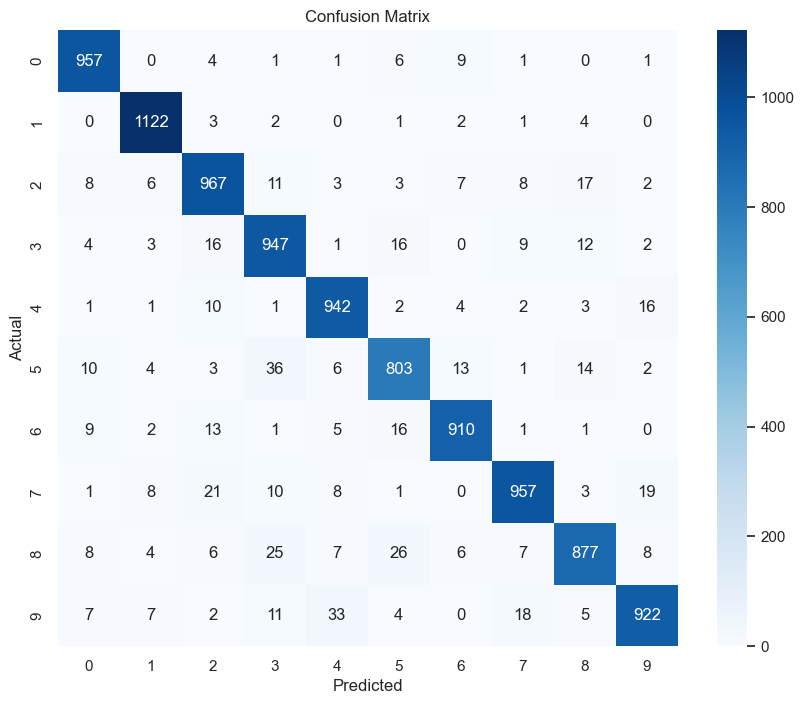

In [82]:
plt.figure(figsize=(10, 8))
sns.heatmap(cm_df, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


As per scikit-learn documentation, the multi-class support is handled according
to a one-vs-one scheme, which in this case is $\binom{n}{2} = \binom{10}{2} = 45$ models for 10 classes. This is incredibly time consuming.

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC